In [1]:
%matplotlib inline
from icecube import dataclasses, dataio
import os
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [2]:
folderpath = '/data/ana/PointSource/PS/IC86_2012/files/sim/2012/neutrino-generator/11069/00000-00999/'
filelist = [ f_name for f_name in os.listdir(folderpath) if f_name[-6:]=='i3.bz2']

In [3]:

DOM_List_Expanded = list(itertools.product(range(1, 87),range(1,65)))
# charge_arr=[[] for i in range(len(DOM_List_Expanded))]
# time_arr=[[] for i in range(len(DOM_List_Expanded))]
charge_arr = []
time_arr = []
trueval_arr = []
#trueval_arr=[[] for i in range(3)]
geometry_file='/data/sim/sim-new/downloads/GCD/GeoCalibDetectorStatus_2012.56063_V0.i3.gz'
geometry = dataio.I3File(geometry_file)
geo = geometry.pop_frame()['I3Geometry'].omgeo
DOM_List = geo.keys() ## Currently unused

In [4]:
#print physics_event.keys()

In [56]:
j=0
for counter, in_file in enumerate(filelist):
    if counter>10:
        break
    event_file = dataio.I3File(os.path.join(folderpath, in_file))
    while event_file.more():
            charge_arr.append(np.zeros((86,64)))
            time_arr.append(np.full((86,64), np.inf))
            physics_event = event_file.pop_physics()
            pulses = physics_event['InIceDSTPulses'].apply(physics_event)
            final_dict = dict()
            for omkey in pulses.keys():
                    temp_time = []
                    temp_charge = []
                    t_zero = np.inf
                    for pulse in pulses[omkey]:
                        temp_time.append(pulse.time)
                        temp_charge.append(pulse.charge)
                    final_dict['({},{})'.format(omkey.string, omkey.om)] = (np.mean(temp_charge) ,np.mean(temp_time))
                    if np.mean(temp_time)<t_zero:
                        t_zero = np.mean(temp_time)
            for dom in DOM_List_Expanded:
                dom_str = str(dom).replace(' ', '')
                if  dom_str in final_dict:
                    charge_arr[j][dom[0]-1][dom[1]-1] = final_dict[dom_str][0]
                    time_arr[j][dom[0]-1][dom[1]-1] = final_dict[dom_str][1]
                else:
                    charge_arr[j][dom[0]-1][dom[1]-1] = 0
                    time_arr[j][dom[0]-1][dom[1]-1] = np.inf
            energy = physics_event['MCMostEnergeticTrack'].energy
            azmiuth = physics_event['MCMostEnergeticTrack'].dir.azimuth 
            zenith = physics_event['MCMostEnergeticTrack'].dir.zenith
            trueval_arr.append([energy,azmiuth, zenith])
            j+=1

In [6]:
print np.shape(charge_arr)

(405, 86, 64)


In [15]:
print np.shape(time_arr[0])
print np.shape(DOM_List_Expanded)

(86, 64)
[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10)]


In [35]:
test = np.array(list(itertools.product(range(1, 87),range(1,65))))

In [38]:
print np.concatenate(test[:,0:1])

[ 1  1  1 ..., 86 86 86]


In [67]:
time_mask = np.ma.array(np.concatenate(time_arr[7]))
time_mask.mask = np.isinf(time_mask)

In [70]:
print time_mask

[-- -- -- ..., -- -- --]


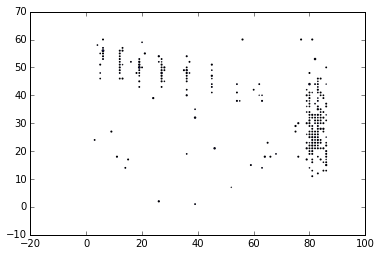

In [72]:
plt.scatter(np.concatenate(test[:,0:1]), np.concatenate(test[:,1:2]), s=np.concatenate(charge_arr[0]))

In [63]:
dtype_doms=zip(DOM_List_Expanded,[np.float64]*(len(DOM_List_Expanded)))
dtype_true=zip(['Zenith', 'Azimuth', 'Track_Energy'],[np.float64]*3)

In [74]:
np.save('truevals.npy', np.array(trueval_arr))
np.save('time.npy', np.array(time_arr))
np.save('charge.npy', np.array(charge_arr))

In [65]:
# np.save('truevals.npy', np.array(zip(*trueval_arr), dtype=dtype_true))
# np.save('time.npy', np.array(zip(*time_arr), dtype=dtype_doms))
# np.save('charge.npy', np.array(zip(*charge_arr), dtype=dtype_doms))

In [54]:
print len(np.array(zip(*charge_arr), dtype=dtype_doms)['(10,1)'])

211


In [47]:
print len(zip(*trueval_arr)[0])
print len(dtype)

3
5504


In [20]:
# string_num = np.concatenate(DOM_List[:,0:1])
# for string in np.arange(1,87):
#     print('{} DOMs on string {}'.format(len(np.where(string_num==string)[0]), string))

In [21]:
# print final_dict

In [22]:
#print val_arr

In [25]:
dtype=zip(DOM_List_Expanded, [(np.float64,np.float64)]*(len(DOM_List_Expanded)-3)+3*[(np.float64)])

In [26]:
print dtype[0:20]

[('(1,1)', (<type 'numpy.float64'>, <type 'numpy.float64'>)), ('(1,2)', (<type 'numpy.float64'>, <type 'numpy.float64'>)), ('(1,3)', (<type 'numpy.float64'>, <type 'numpy.float64'>)), ('(1,4)', (<type 'numpy.float64'>, <type 'numpy.float64'>)), ('(1,5)', (<type 'numpy.float64'>, <type 'numpy.float64'>)), ('(1,6)', (<type 'numpy.float64'>, <type 'numpy.float64'>)), ('(1,7)', (<type 'numpy.float64'>, <type 'numpy.float64'>)), ('(1,8)', (<type 'numpy.float64'>, <type 'numpy.float64'>)), ('(1,9)', (<type 'numpy.float64'>, <type 'numpy.float64'>)), ('(1,10)', (<type 'numpy.float64'>, <type 'numpy.float64'>)), ('(1,11)', (<type 'numpy.float64'>, <type 'numpy.float64'>)), ('(1,12)', (<type 'numpy.float64'>, <type 'numpy.float64'>)), ('(1,13)', (<type 'numpy.float64'>, <type 'numpy.float64'>)), ('(1,14)', (<type 'numpy.float64'>, <type 'numpy.float64'>)), ('(1,15)', (<type 'numpy.float64'>, <type 'numpy.float64'>)), ('(1,16)', (<type 'numpy.float64'>, <type 'numpy.float64'>)), ('(1,17)', (<typ

In [27]:
output_array=np.array(zip(*val_arr), dtype = dtype)

ValueError: setting an array element with a sequence.

In [266]:
print dtype[-10:]

[('(86,58)', (<type 'numpy.float64'>, <type 'numpy.float64'>)), ('(86,59)', (<type 'numpy.float64'>, <type 'numpy.float64'>)), ('(86,60)', (<type 'numpy.float64'>, <type 'numpy.float64'>)), ('(86,61)', (<type 'numpy.float64'>, <type 'numpy.float64'>)), ('(86,62)', (<type 'numpy.float64'>, <type 'numpy.float64'>)), ('(86,63)', (<type 'numpy.float64'>, <type 'numpy.float64'>)), ('(86,64)', (<type 'numpy.float64'>, <type 'numpy.float64'>)), ('Zenith', <type 'numpy.float64'>), ('Azimuth', <type 'numpy.float64'>), ('Track_Energy', <type 'numpy.float64'>)]


In [246]:
print len(dtype)
print len(val_arr)

5504
5507


In [135]:
print zip(*val_arr[-3:])

[(1.9048496847770642, 5.33505864133153, 18828.13737195381), (2.9148686603875174, 5.880295817518997, 306.489950524923)]


In [197]:
print output_array[0]

[[0 0]
 [0 0]
 [0 0]
 ..., 
 [0 0]
 [0 0]
 [0 0]]


In [21]:
dtype= [
        ('test1' , np.float32, 2),
        ('test2' , np.float32, 2),
        ('test3' , np.float32),
        ]

test_arr = [[(1,2), (3,4), (5,6)],[(7,8), (9,10), (11,12)],[13,14]]

output = np.array(zip(*test_arr), dtype= dtype)

In [28]:
print np.concatenate(output[0])

ValueError: all the input arrays must have same number of dimensions